### Problem Statement : 
#### Many middle class family want to buy their own car, but due to high prices of new cars most of them are unable to afford. Here the dataset contains used cars data with some additional information alongwith their prices, the goal is to predict the price of the used car by putting some additional information. This model will help them to predict the price of their choice of car.

### Import

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [47]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV,cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
# from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

In [48]:
df = pd.read_csv("cars_data_clean.csv")
df.head()

,usedCarSkuId,loc,myear,body,transmission,fuel,km,ip,images,imgCount,threesixty,dvn,oem,model,variant,City,listed_price,discountValue,utype,carType,top_features,comfort_features,interior_features,exterior_features,safety_features,Color,Engine Type,No of Cylinder,Valves per Cylinder,Valve Configuration,Turbo Charger,Super Charger,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Gear Box,Drive Type,Seats,Steering Type,Turning Radius,Front Brake Type,Rear Brake Type,Top Speed,Acceleration,Tyre Type,Doors,Cargo Volume,model_type_new,state,exterior_color,owner_type,Fuel Suppy System,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
0,7111bf25-97af-47f9-867b-40879190d800,gomti nagar,2016,hatchback,manual,cng,69162.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,False,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,lucknow,370000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'rem...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",silver,k10b engine,3.0,4.0,dohc,False,False,3599.0,1495.0,1700.0,2400.0,1295.0,1290.0,960.0,1350.0,5 speed,fwd,5.0,power,4.6,ventilated disc,drum,137.0,15.90,tubeless,5.0,180.0,used,uttar pradesh,silver,first,NaN,NaN,NaN,NaN,58.16,6200.0,77.0,3500.0,69.0,NaN
1,c309efc1-efaf-4f82-81ad-dcb38eb36665,borivali west,2015,hatchback,manual,cng,45864.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,False,maruti celerio green vxi,maruti,maruti celerio,green vxi,mumbai,365000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'digital odomete...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",grey,k10b engine,3.0,4.0,dohc,False,False,3600.0,1600.0,1560.0,2425.0,1420.0,1410.0,915.0,1350.0,5 speed,fwd,5.0,power,4.7,ventilated disc,drum,150.0,15.05,tubeless radial,5.0,235.0,used,maharashtra,grey,first,Gasoline Port Injection,11.0,NaN,NaN,58.20,6000.0,78.0,3500.0,73.0,NaN
2,7609f710-0c97-4f00-9a47-9b9284b62d3a,jasola,2015,sedan,manual,cng,81506.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,15,False,honda amaze s plus i-vtec,honda,honda amaze,s plus i-vtec,new delhi,421000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'pow...","['air conditioner', 'heater', 'adjustable stee...","['adjustable head lights', 'power adjustable e...","['centeral locking', 'power door locks', 'chil...",silver,i-vtec petrol engine,4.0,4.0,sohc,False,False,3990.0,1680.0,1505.0,2405.0,NaN,NaN,950.0,NaN,5 speed,fwd,5.0,power,4.5,disc,drum,160.0,15.00,tubeless radial,4.0,400.0,used,delhi,silver,second,NaN,NaN,NaN,NaN,86.70,6000.0,109.0,4500.0,NaN,NaN
3,278b76e3-5539-4a5e-ae3e-353a2e3b6d7d,jasola,2013,hatchback,manual,cng,115893.0,0,[{'img': ''}],0,False,maruti wagon r lxi cng,maruti,maruti wagon r,lxi cng,new delhi,240000.0,0,dealer,corporate,"['power steering', 'power windows front', 'air...","['power steering', 'power windows front', 'low...","['air conditioner', 'heater', 'electronic mult...","['adjustable head lights', 'manually adjustabl...","['centeral locking', 'child safety locks', 'da...",silver,k series petrol engine,3.0,4.0,NaN,False,False,3595.0,1475.0,1700.0,2400.0,1295.0,1290.0,960.0,1350.0,5 speed,fwd,5.0,power,4.6,ventilated disc,drum,NaN,NaN,tubeless radial,4.0,NaN,used,delhi,silver,second,Multi-Point Fuel Injection,NaN,13.0,NaN,58.20,6200.0,77.0,3500.0,NaN,NaN
4,b1eab99b-a606-48dd-a75b-57feb8a9ad92,mumbai g.p.o.,2022,muv,manual,cng,18900.0,0,[{'img': 'https://images10.gaadi.com/usedcar_i...,6,False,maruti ertiga vxi cng,maruti,maruti ertiga,vxi cng,mumbai,1175000.0,0,dealer,partner,"

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37813 entries, 0 to 37812
Data columns (total 66 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   usedCarSkuId              37813 non-null  object 
 1   loc                       31963 non-null  object 
 2   myear                     37813 non-null  int64  
 3   body                      37794 non-null  object 
 4   transmission              37813 non-null  object 
 5   fuel                      37813 non-null  object 
 6   km                        37813 non-null  float64
 7   ip                        37813 non-null  int64  
 8   images                    37813 non-null  object 
 9   imgCount                  37813 non-null  int64  
 10  threesixty                37813 non-null  bool   
 11  dvn                       37813 non-null  object 
 12  oem                       37813 non-null  object 
 13  model                     37813 non-null  object 
 14  varian

- There are many columns with null values

In [50]:
df.describe()

,myear,km,ip,imgCount,listed_price,discountValue,No of Cylinder,Valves per Cylinder,Length,Width,Height,Wheel Base,Front Tread,Rear Tread,Kerb Weight,Gross Weight,Seats,Turning Radius,Top Speed,Acceleration,Doors,Cargo Volume,Compression Ratio,Alloy Wheel Size,Ground Clearance Unladen,Max Power Delivered,Max Power At,Max Torque Delivered,Max Torque At,Bore,Stroke
count,37813.000000,3.781300e+04,37813.000000,37813.000000,3.781300e+04,37813.000000,37670.000000,37585.000000,37451.000000,37442.000000,37450.000000,37257.000000,21939.000000,21938.000000,24674.000000,16923.000000,37795.000000,31965.000000,22461.000000,23825.000000,37769.000000,31081.000000,10012.000000,23352.000000,2152.000000,37582.000000,35566.000000,37582.000000,35837.000000,12636.000000,513.000000
mean,2015.569513,6.240930e+04,0.010208,15.571417,7.999868e+05,73.281702,3.819405,3.893947,4113.622867,1725.594092,1577.554846,2545.820490,1470.019436,1469.290610,1146.356651,1709.088105,5.236724,5.494009,172.993726,13.133427,4.664090,363.091857,12.833272,15.450154,179.415892,102.754960,5102.916268,178.772195,3161.846053,72.413974,83.495166
std,3.779089,5.847216e+04,0.100520,8.358068,3.043045e+06,2805.783272,0.541427,0.478499,399.357437,128.293124,115.152051,155.295399,90.372660,100.562373,318.518350,441.591645,0.722250,49.399708,26.630806,3.309054,0.496527,130.412817,5.259472,1.521884,25.989455,42.784165,1056.280170,106.352882,1025.049102,11.906693,4.654386
min,1983.000000,1.010000e+02,0.000000,0.000000,1.196300e+04,0.000000,1.000000,1.000000,2752.000000,1312.000000,1165.000000,1840.000000,1143.000000,15.000000,451.000000,785.000000,0.000000,3.500000,70.000000,2.500000,2.000000,20.000000,4.170000,7.000000,91.000000,10.800000,1620.000000,4.800000,160.000000,2.850000,71.500000
25%,2013.000000,3.173900e+04,0.000000,10.000000,3.200000e+05,0.000000,4.000000,4.000000,3795.000000,1680.000000,1495.000000,2425.000000,1420.000000,1420.000000,935.000000,1350.000000,5.000000,4.800000,156.000000,11.070000,4.000000,256.000000,10.100000,14.000000,178.000000,74.960000,4000.000000,110.000000,2125.000000,69.600000,82.500000
50%,2016.000000,5.672600e+04,0.000000,15.000000,5.250000e+05,0.000000,4.000000,4.000000,3995.000000,1710.000000,1530.000000,2520.000000,1485.000000,1493.000000,1066.000000,1595.000000,5.000000,5.100000,168.560000,13.200000,5.000000,350.000000,10.500000,16.000000,190.000000,88.500000,5500.000000,145.000000,3375.000000,73.000000,85.000000
75%,2018.000000,8.331000e+04,0.000000,21.000000,8.552720e+05,0.000000,4.000000,4.000000,4440.000000,1790.000000,1642.000000,2647.000000,1530.000000,1525.000000,1230.000000,1967.500000,5.000000,5.300000,189.000000,14.850000,5.000000,465.000000,16.200000,16.000000,192.000000,118.350000,6000.000000,224.000000,4000.000000,76.500000,85.800000
max,2023.000000,6.300000e+06,1.000000,74.000000,5.500006e+08,200000.000000,16.000000,48.000000,5982.000000,2236.000000,2075.000000,3772.000000,1705.000000,1834.000000,2962.000000,3490.000000,14.000000,6250.000000,340.000000,44.040000,6.000000,2055.000000,81.000000,21.000000,213.000000,769.310000,8250.000000,900.000000,21800.000000,165.000000,104.900000


In [51]:
df.isnull().sum()

usedCarSkuId                0
loc                      5850
myear                       0
body                       19
transmission                0
                        ...  
Max Power At             2247
Max Torque Delivered      231
Max Torque At            1976
Bore                    25177
Stroke                  37300
Length: 66, dtype: int64

In [52]:
df.duplicated().value_counts()

False    37813
Name: count, dtype: int64

### data Cleaning and preprocessing

In [53]:
df["loc"].isnull().sum()/len(df) * 100

np.float64(15.470869806680243)

In [54]:
for cols in df.columns:
    if (df[cols].isnull().sum()/len(df)*100) > 10:
        print(cols)

loc
Valve Configuration
Front Tread
Rear Tread
Kerb Weight
Gross Weight
Drive Type
Turning Radius
Top Speed
Acceleration
Cargo Volume
Fuel Suppy System
Compression Ratio
Alloy Wheel Size
Ground Clearance Unladen
Bore
Stroke


- **The above cols/variables are unnecessary and have more than 10% of missing values**

In [55]:
## Remove unnecessary columns, columns with too much missing values and low impact on price
df.columns

Index(['usedCarSkuId', 'loc', 'myear', 'body', 'transmission', 'fuel', 'km',
       'ip', 'images', 'imgCount', 'threesixty', 'dvn', 'oem', 'model',
       'variant', 'City', 'listed_price', 'discountValue', 'utype', 'carType',
       'top_features', 'comfort_features', 'interior_features',
       'exterior_features', 'safety_features', 'Color', 'Engine Type',
       'No of Cylinder', 'Valves per Cylinder', 'Valve Configuration',
       'Turbo Charger', 'Super Charger', 'Length', 'Width', 'Height',
       'Wheel Base', 'Front Tread', 'Rear Tread', 'Kerb Weight',
       'Gross Weight', 'Gear Box', 'Drive Type', 'Seats', 'Steering Type',
       'Turning Radius', 'Front Brake Type', 'Rear Brake Type', 'Top Speed',
       'Acceleration', 'Tyre Type', 'Doors', 'Cargo Volume', 'model_type_new',
       'state', 'exterior_color', 'owner_type', 'Fuel Suppy System',
       'Compression Ratio', 'Alloy Wheel Size', 'Ground Clearance Unladen',
       'Max Power Delivered', 'Max Power At', 'Max Torq

In [56]:
cols_to_remove = ['usedCarSkuId', 'loc','images','imgCount','dvn','discountValue','carType','comfort_features','interior_features',
                  'exterior_features','safety_features', 'Valve Configuration', 'Valves per Cylinder', 'Super Charger', 'Front Tread', 'Rear Tread', 'Kerb Weight',
                'Gross Weight', 'Doors', 'model_type_new', 'exterior_color', 'Fuel Suppy System', 'Compression Ratio', 'Alloy Wheel Size',
                  'Ground Clearance Unladen', 'Bore', 'Stroke', 'Turning Radius', 'Top Speed', 'Acceleration', 'Engine Type', 
                'Valves per Cylinder', 'Max Power At', 'Max Torque At', 'Steering Type','threesixty', 'Front Brake Type', 'Rear Brake Type',
                  'City', 'Color', 'Wheel Base', 'Gear Box', 'Drive Type', 'Tyre Type', 'Cargo Volume', 'Turbo Charger', 'variant']

- **All The above columns are removed for better analysis and model building**
- removing 'variant' column as it has around 3000+ unique values which is difficult to pre process

In [57]:
new_df = df.drop(columns=cols_to_remove)

In [58]:
# Renaming cols for better interpretability

new_df.rename(columns={'myear':'manuf_year', 'km':'km_driven', 'ip':'insurance_prem', 'oem':'manufacturer', 'utype':'car_seller',
                        'No of Cylinder':'No_of_cylinder', 'Max Power Delivered':'Max_power(bhp)', 'Max Torque Delivered':'Max_torque(Nm)'}, inplace=True)

In [59]:
new_df.head(10)

,manuf_year,body,transmission,fuel,km_driven,insurance_prem,manufacturer,model,listed_price,car_seller,top_features,No_of_cylinder,Length,Width,Height,Seats,state,owner_type,Max_power(bhp),Max_torque(Nm)
0,2016,hatchback,manual,cng,69162.0,0,maruti,maruti wagon r,370000.0,dealer,"['power steering', 'power windows front', 'air...",3.0,3599.0,1495.0,1700.0,5.0,uttar pradesh,first,58.16,77.0
1,2015,hatchback,manual,cng,45864.0,0,maruti,maruti celerio,365000.0,dealer,"['power steering', 'power windows front', 'air...",3.0,3600.0,1600.0,1560.0,5.0,maharashtra,first,58.20,78.0
2,2015,sedan,manual,cng,81506.0,0,honda,honda amaze,421000.0,dealer,"['power steering', 'power windows front', 'air...",4.0,3990.0,1680.0,1505.0,5.0,delhi,second,86.70,109.0
3,2013,hatchback,manual,cng,115893.0,0,maruti,maruti wagon r,240000.0,dealer,"['power steering', 'power windows front', 'air...",3.0,3595.0,1475.0,1700.0,5.0,delhi,second,58.20,77.0
4,2022,muv,manual,cng,18900.0,0,maruti,maruti ertiga,1175000.0,dealer,"['power steering', 'power windows front', 'air...",4.0,4395.0,1735.0,1690.0,7.0,maharashtra,first,86.63,121.5
5,2012,hatchback,manual,cng,60000.0,0,maruti,maruti wagon r,250000.0,dealer,"['power steering', 'power windows front', 'air...",3.0,3599.0,1495.0,1700.0,5.0,delhi,first,58.16,77.0
6,2010,hatchback,manual,cng,67000.0,0,maruti,maruti alto,145000.0,dealer,"['power steering', 'remote fuel lid opener', '...",3.0,3495.0,1475.0,1460.0,5.0,delhi,first,38.40,62.0
7,2017,hatchback,manual,cng,58000.0,0,hyundai,hyundai grand i10,465000.0,dealer,"['power steering', 'power windows front', 'air...",4.0,3765.0,1660.0,1520.0,5.0,delhi,first,65.39,98.0
8,2021,hatchback,manual,cng,54097.0,0,maruti,maruti wagon r,560000.0,dealer,"['power steering', 'power windows front', 'air...",3.0,3655.0,1620.0,1675.0,5.0,haryana,first,58.33,78.0
9,2011,hatchback,manual,cng,67000.0,0,maruti,maruti wagon r,215000.0,dealer,"['power steering', 'power windows front', 'air...",3.0,3599.0,1495.0,1700.0,5.0,delhi,second,58.16,77.0


In [60]:
# car age derived from manufactured year
new_df["car_age"] = 2025 - new_df["manuf_year"]

In [61]:
new_df.head()

,manuf_year,body,transmission,fuel,km_driven,insurance_prem,manufacturer,model,listed_price,car_seller,top_features,No_of_cylinder,Length,Width,Height,Seats,state,owner_type,Max_power(bhp),Max_torque(Nm),car_age
0,2016,hatchback,manual,cng,69162.0,0,maruti,maruti wagon r,370000.0,dealer,"['power steering', 'power windows front', 'air...",3.0,3599.0,1495.0,1700.0,5.0,uttar pradesh,first,58.16,77.0,9
1,2015,hatchback,manual,cng,45864.0,0,maruti,maruti celerio,365000.0,dealer,"['power steering', 'power windows front', 'air...",3.0,3600.0,1600.0,1560.0,5.0,maharashtra,first,58.20,78.0,10
2,2015,sedan,manual,cng,81506.0,0,honda,honda amaze,421000.0,dealer,"['power steering', 'power windows front', 'air...",4.0,3990.0,1680.0,1505.0,5.0,delhi,second,86.70,109.0,10
3,2013,hatchback,manual,cng,115893.0,0,maruti,maruti wagon r,240000.0,dealer,"['power steering', 'power windows front', 'air...",3.0,3595.0,1475.0,1700.0,5.0,delhi,second,58.20,77.0,12
4,2022,muv,manual,cng,18900.0,0,maruti,maruti ertiga,1175000.0,dealer,"['power steering', 'power windows front', 'air...",4.0,4395.0,1735.0,1690.0,7.0,maharashtra,first,86.63,121.5,3


- **Converting the top features arrays into numbers by counting no of top features**

In [62]:
new_df["top_features_count"] = new_df["top_features"].apply(lambda x: len(eval(x)) if pd.notnull(x) else 0)
new_df = new_df.drop(columns=['top_features'])


In [63]:
new_df.head()

,manuf_year,body,transmission,fuel,km_driven,insurance_prem,manufacturer,model,listed_price,car_seller,No_of_cylinder,Length,Width,Height,Seats,state,owner_type,Max_power(bhp),Max_torque(Nm),car_age,top_features_count
0,2016,hatchback,manual,cng,69162.0,0,maruti,maruti wagon r,370000.0,dealer,3.0,3599.0,1495.0,1700.0,5.0,uttar pradesh,first,58.16,77.0,9,9
1,2015,hatchback,manual,cng,45864.0,0,maruti,maruti celerio,365000.0,dealer,3.0,3600.0,1600.0,1560.0,5.0,maharashtra,first,58.20,78.0,10,8
2,2015,sedan,manual,cng,81506.0,0,honda,honda amaze,421000.0,dealer,4.0,3990.0,1680.0,1505.0,5.0,delhi,second,86.70,109.0,10,9
3,2013,hatchback,manual,cng,115893.0,0,maruti,maruti wagon r,240000.0,dealer,3.0,3595.0,1475.0,1700.0,5.0,delhi,second,58.20,77.0,12,8
4,2022,muv,manual,cng,18900.0,0,maruti,maruti ertiga,1175000.0,dealer,4.0,4395.0,1735.0,1690.0,7.0,maharashtra,first,86.63,121.5,3,9


#### imputing missing values

In [64]:
# checkg for missing values again
new_df.isnull().sum()

manuf_year              0
body                   19
transmission            0
fuel                    0
km_driven               0
insurance_prem          0
manufacturer            0
model                   0
listed_price            0
car_seller              0
No_of_cylinder        143
Length                362
Width                 371
Height                363
Seats                  18
state                   0
owner_type              0
Max_power(bhp)        231
Max_torque(Nm)        231
car_age                 0
top_features_count      0
dtype: int64

- **Imputing the null values with median and mode**

In [65]:
new_df["body"] = new_df["body"].fillna("minivans")
new_df["No_of_cylinder"] = new_df["No_of_cylinder"].fillna(new_df["No_of_cylinder"].mode()[0])
new_df["Length"] = new_df["Length"].fillna(new_df["Length"].median())
new_df["Width"] = new_df["Width"].fillna(new_df["Width"].median())
new_df["Height"] = new_df["Height"].fillna(new_df["Height"].median())
new_df["Max_power(bhp)"] = new_df["Max_power(bhp)"].fillna(new_df["Max_power(bhp)"].median())
new_df["Max_torque(Nm)"] = new_df["Max_torque(Nm)"].fillna(new_df["Max_torque(Nm)"].median())
new_df["Seats"] = new_df["Seats"].fillna(new_df["Seats"].mode()[0])

In [66]:
new_df.isnull().sum()

manuf_year            0
body                  0
transmission          0
fuel                  0
km_driven             0
insurance_prem        0
manufacturer          0
model                 0
listed_price          0
car_seller            0
No_of_cylinder        0
Length                0
Width                 0
Height                0
Seats                 0
state                 0
owner_type            0
Max_power(bhp)        0
Max_torque(Nm)        0
car_age               0
top_features_count    0
dtype: int64

#### Reducing the models by removing the car model appearing for very less number of times
- taking only top 140 models with the last model count with approx 25
- filtering the dataset based on that

In [67]:
top_models = new_df["model"].value_counts().head(140).index
filtered_df = new_df[new_df["model"].isin(top_models)]

In [68]:
print(len(new_df))
print(len(filtered_df))

37813
35415


- **checking for Outliers and removing the outliers**

In [69]:
# Numeric columns
numeric_cols = ['car_age', 'km_driven', 'Length', 'Width', 'Height', 
                'Max_power(bhp)', 'Max_torque(Nm)', 'listed_price']

total_rows = filtered_df.shape[0]

outlier_indices = set()

for col in numeric_cols:
    lower_bound = filtered_df[col].quantile(0.015)
    upper_bound = filtered_df[col].quantile(0.985)
    
    outliers = filtered_df[(filtered_df[col] < lower_bound) | (filtered_df[col] > upper_bound)].index
    outlier_indices.update(outliers)

filtered_df = filtered_df.drop(index=outlier_indices)

### EDA

In [70]:
print(len(filtered_df["manufacturer"].unique()))
print(len(filtered_df["model"].unique()))
# print(len(new_df["variant"].unique()))

22
128


#### Univariate Analysis

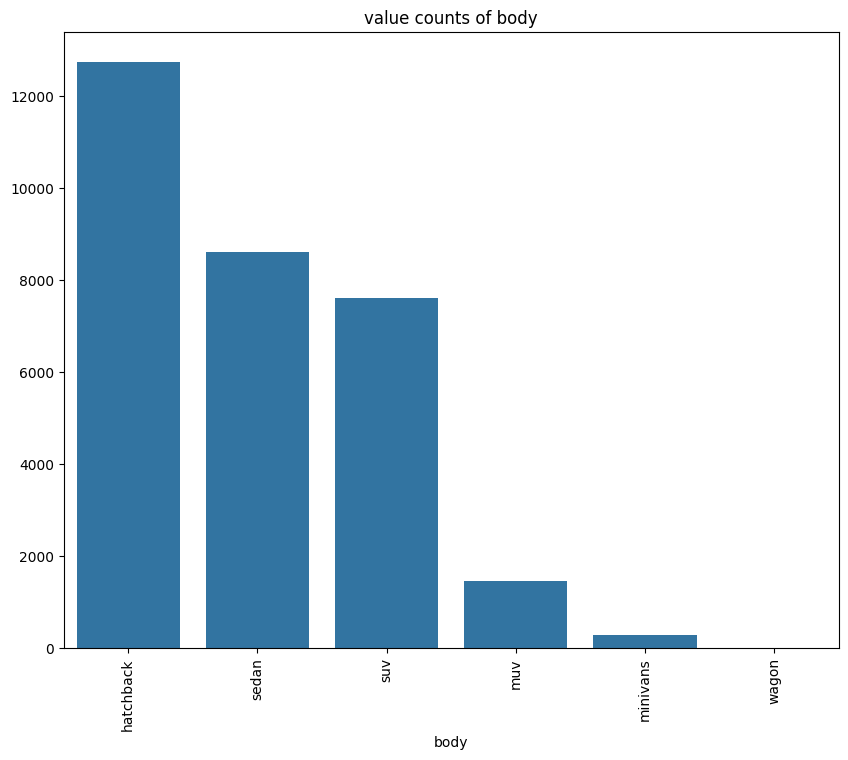

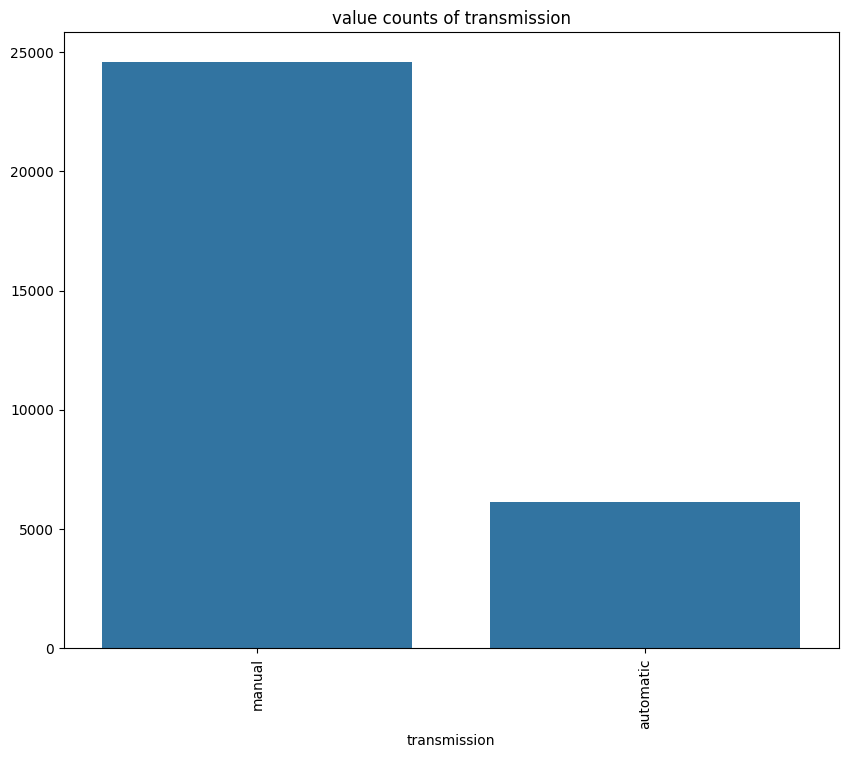

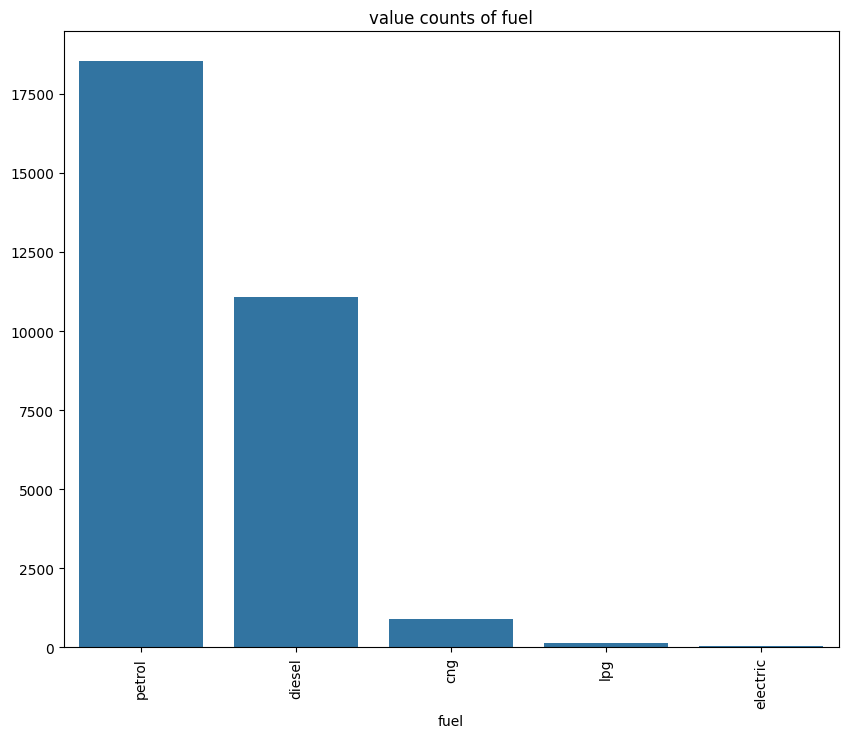

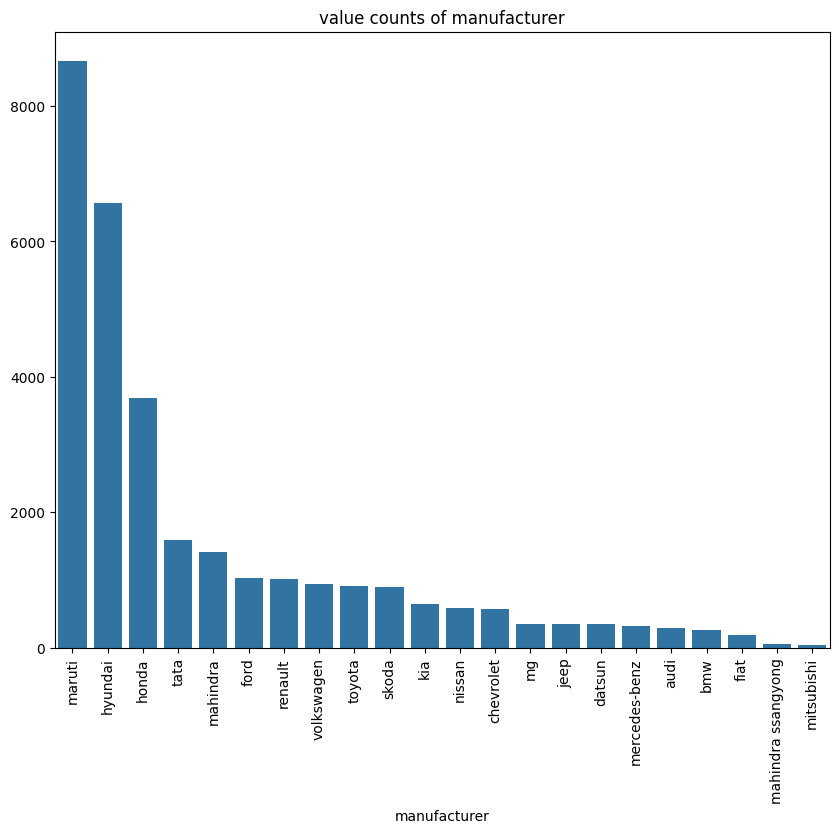

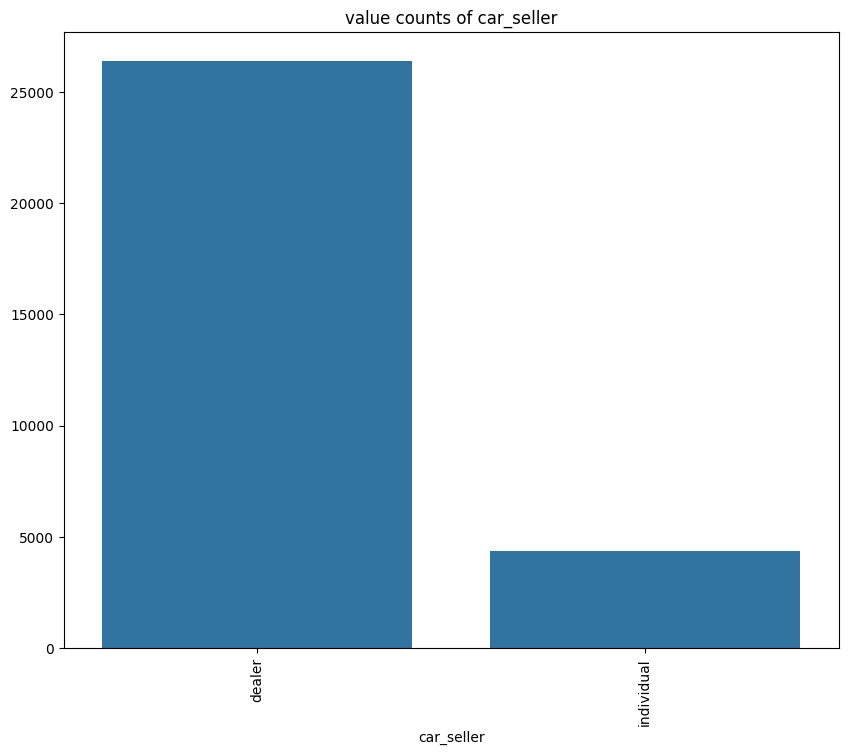

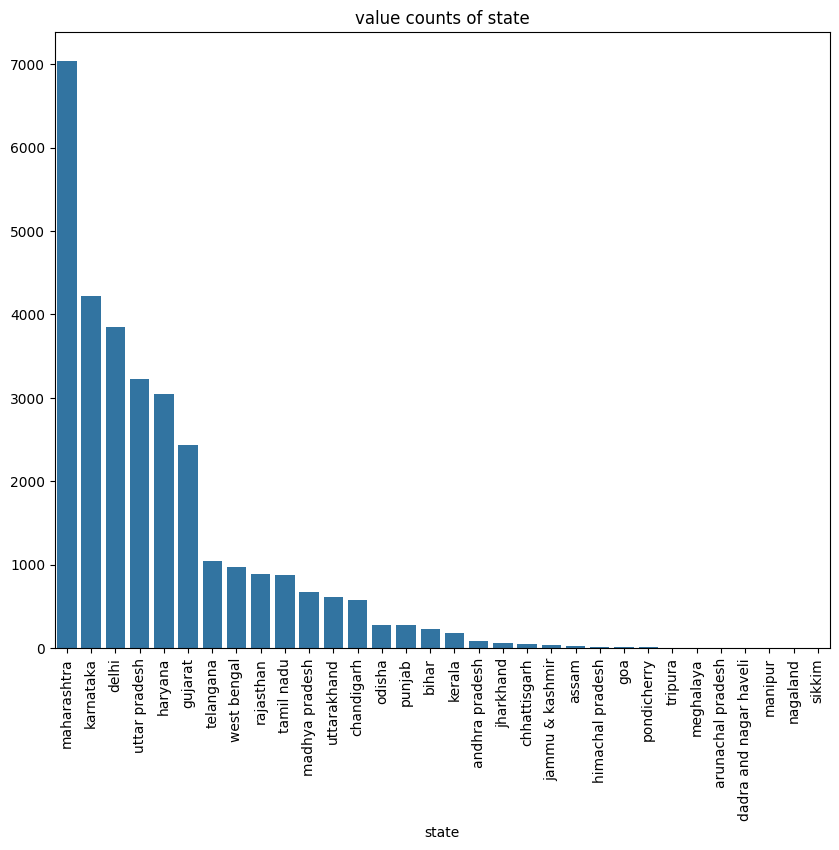

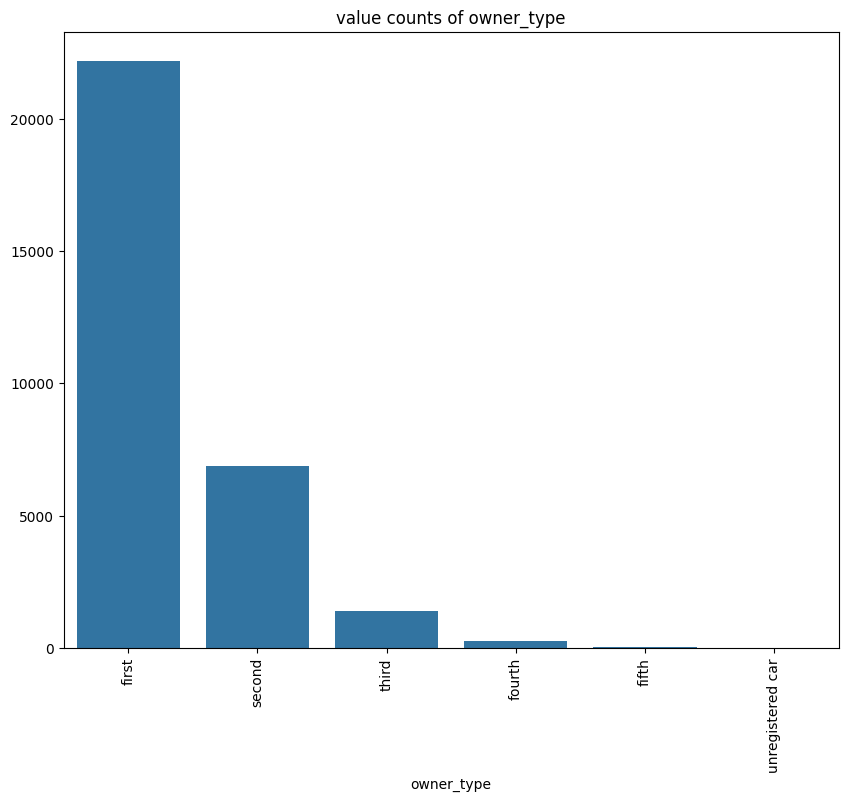

In [71]:
for i in ['body', 'transmission', 'fuel', 'manufacturer', 'car_seller', 'state', 'owner_type']:
    plt.figure(figsize=(10,8))
    sns.barplot(x=filtered_df[i].value_counts().index, y=filtered_df[i].value_counts().values)
    plt.xticks(rotation=90)
    plt.title(f"value counts of {i}")
    plt.show()

#### Insights from barplot
1. Body - Dataset contains most number of hatchback cars, followed by Sedan and then SUVs
2. transmission - Majority of cars have manual transmission
3. Fuel - most cars use Petrol, followed by diesel
4. Brand - Maruti is the most common brand, then Hyundai
5. seller - Most listings are from dealers
6. state - Maharashtra State has most listed cars followed by Karnataka and Delhi
7. owner_type - Majority of cars are first-owner vehicles.

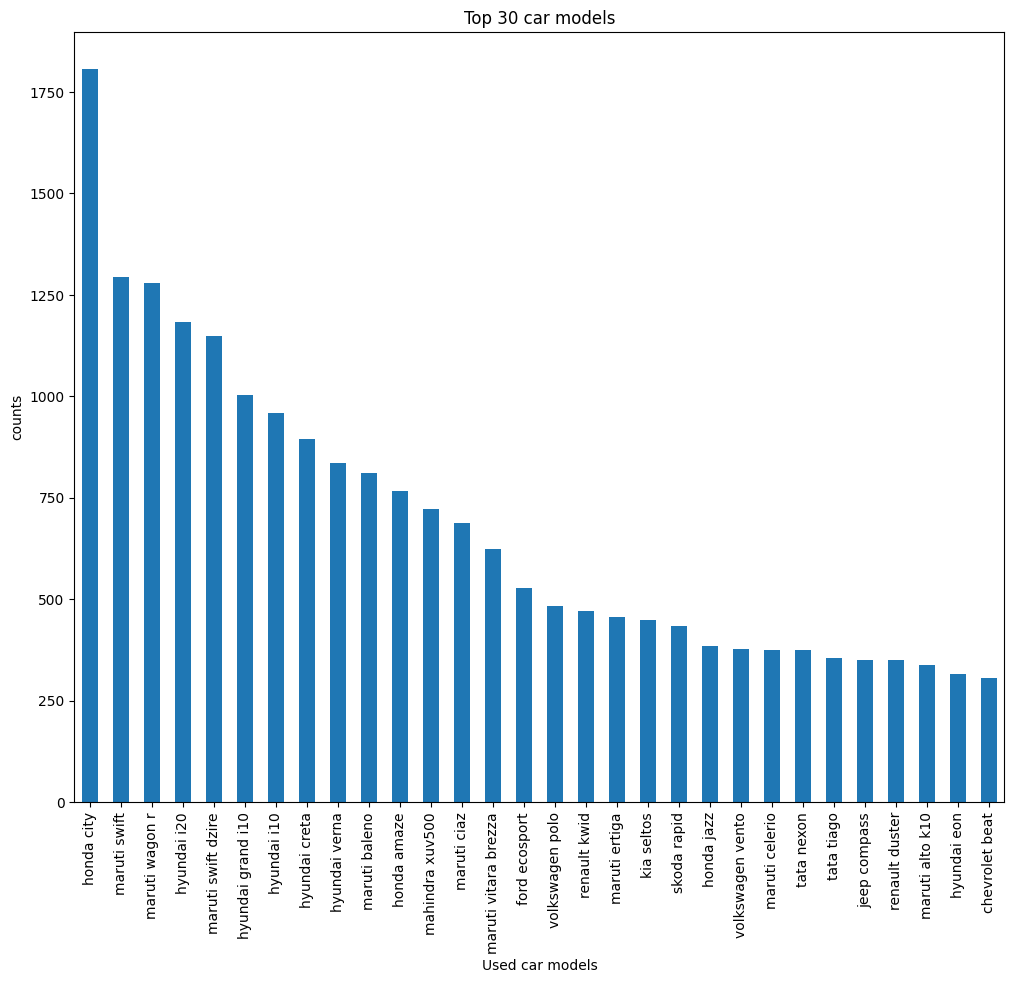

In [72]:
#### Top 30 Car models

plt.figure(figsize=(12, 10))
filtered_df["model"].value_counts().head(30).plot(kind='bar')
plt.title("Top 30 car models")
plt.xlabel("Used car models")
plt.ylabel("counts")
plt.show()

- **The above plot contains Top 30 common cars listed**
- **Honda city, i20 and swift tops the list**

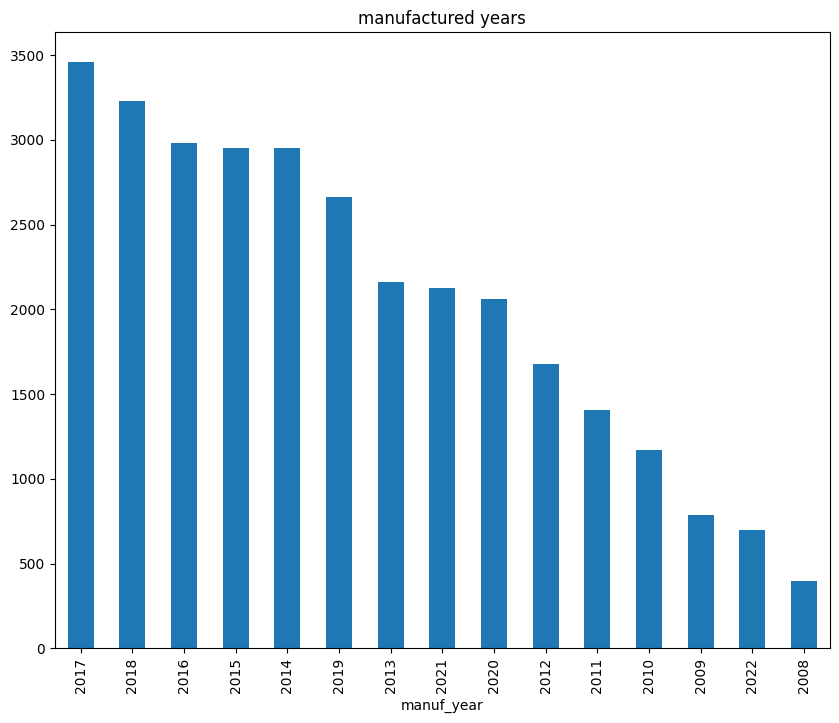

In [73]:
plt.figure(figsize=(10,8))
filtered_df.manuf_year.value_counts().plot(kind='bar')
plt.title("manufactured years")
plt.show()

- **Most of the cars listed are manufactured on:**
    - 2017
    - 2018
    - 2014

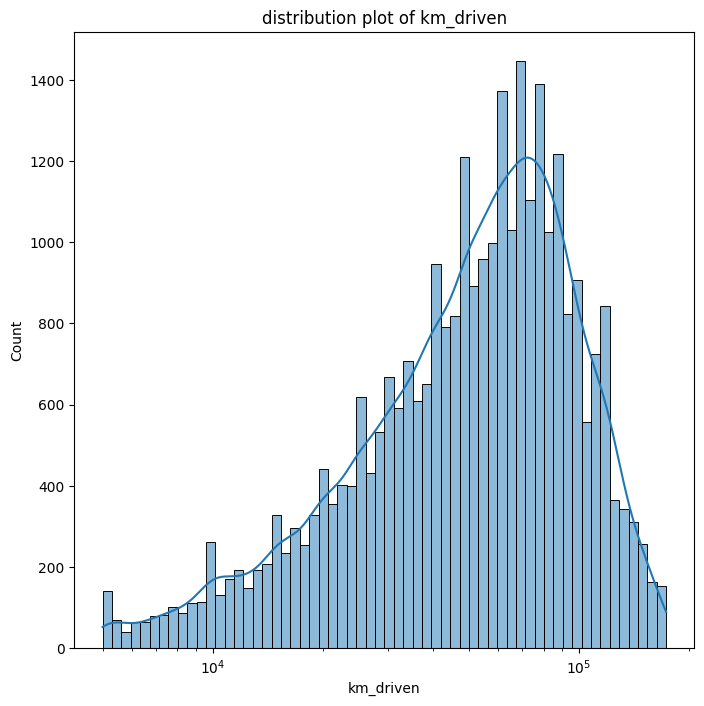

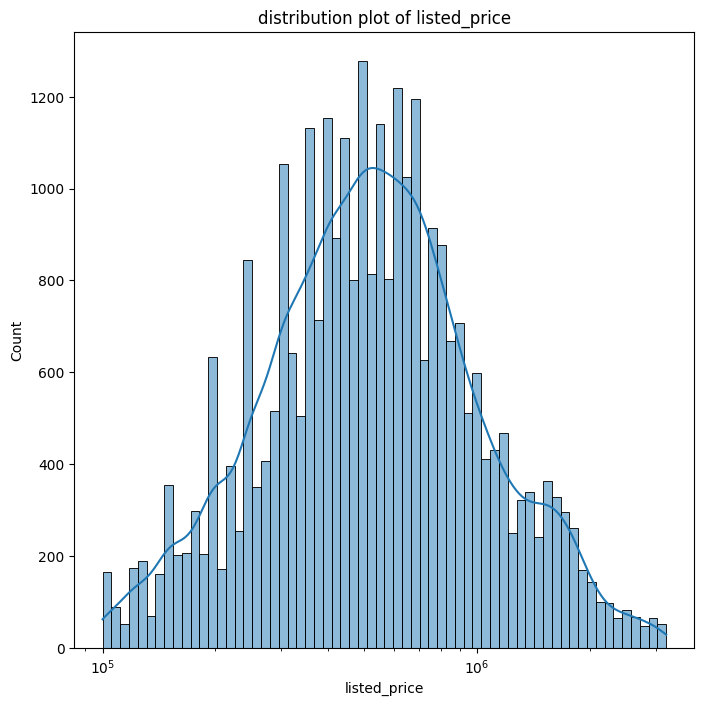

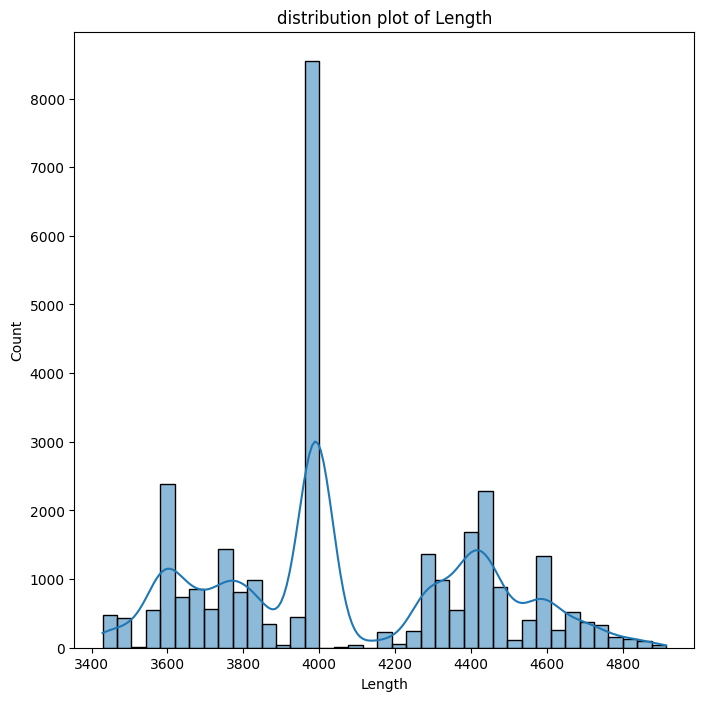

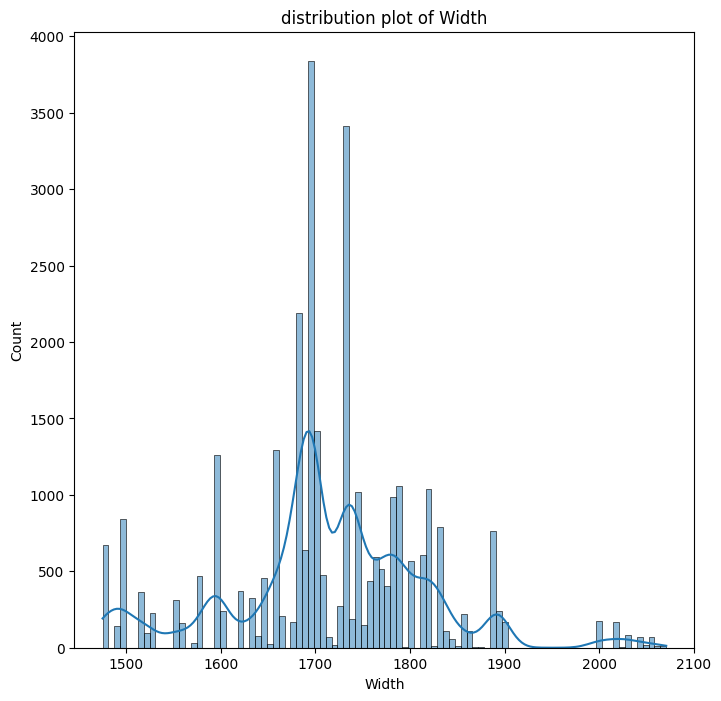

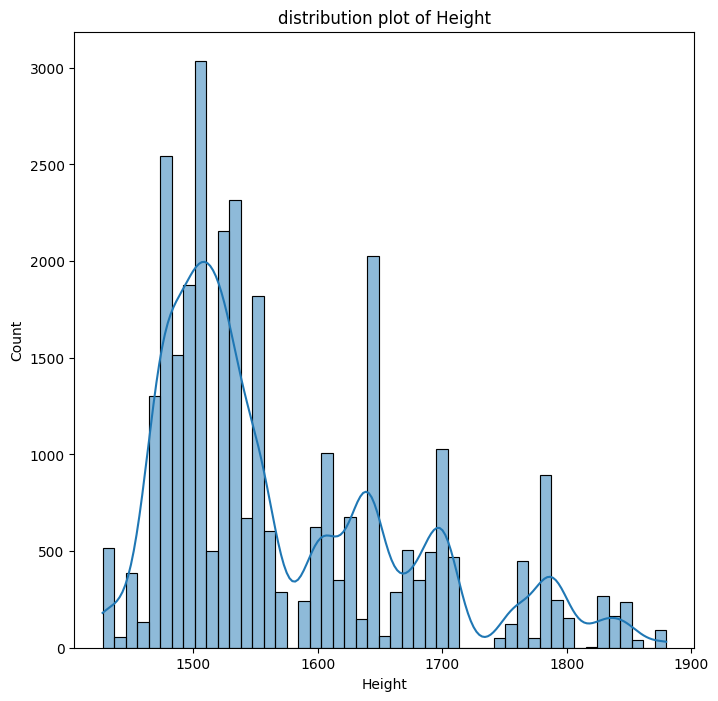

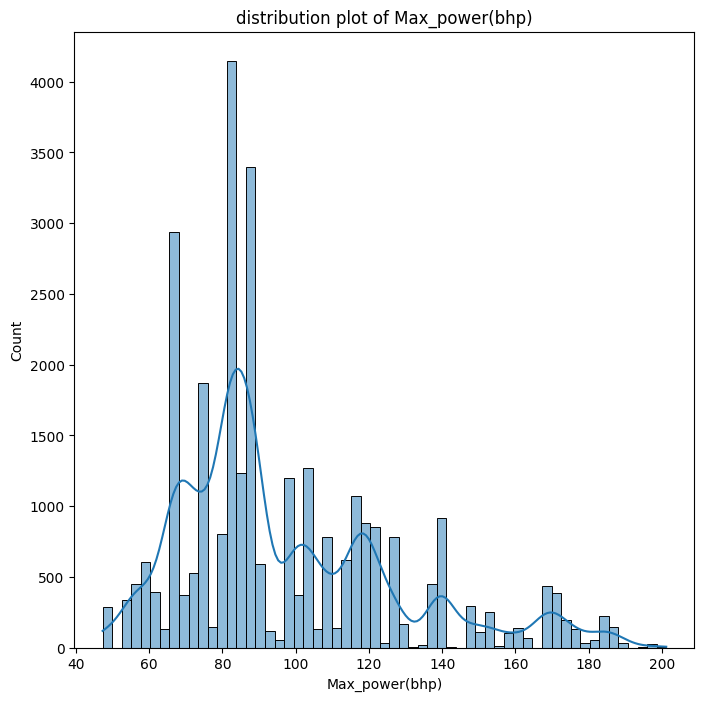

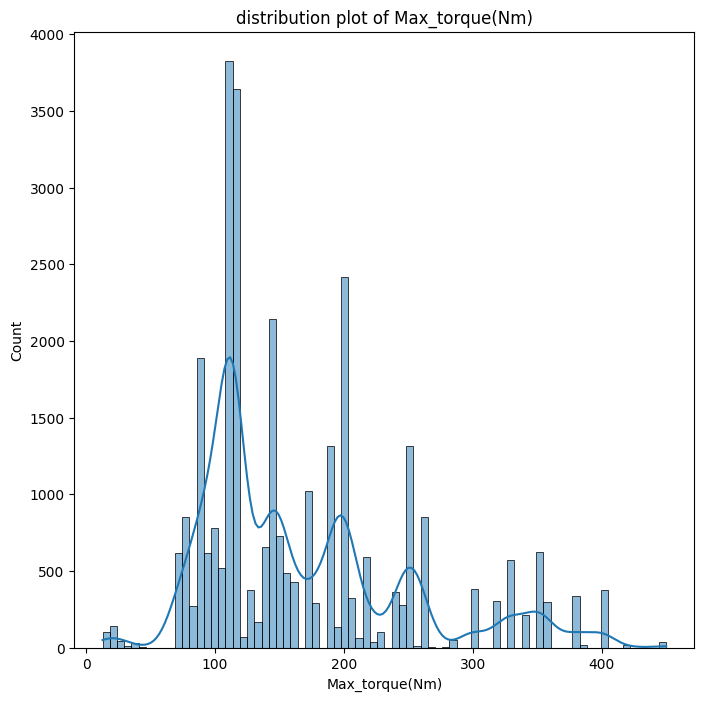

In [74]:
for i in list(['km_driven', 'listed_price', 'Length', 'Width', 'Height', 'Max_power(bhp)', 'Max_torque(Nm)']):
    plt.figure(figsize=(8,8))
    if i == "km_driven" or i == "listed_price":
        sns.histplot(data=filtered_df, x=i, kde=True, log_scale=True)
    else:
        sns.histplot(data=filtered_df, x=i, kde=True)
    plt.title(f"distribution plot of {i}")
    plt.show()

#### Insights from Histplots:
1. Most of the cars are driven around 10^4 and 10^5, i.e thousands and lakhs of kilometers
2. Price ranges from lakhs to millions in Rupees
3. Length, width and height is not much useful in this analysis
4. Max power ranges from 70 to 200, with some rise and falls in between

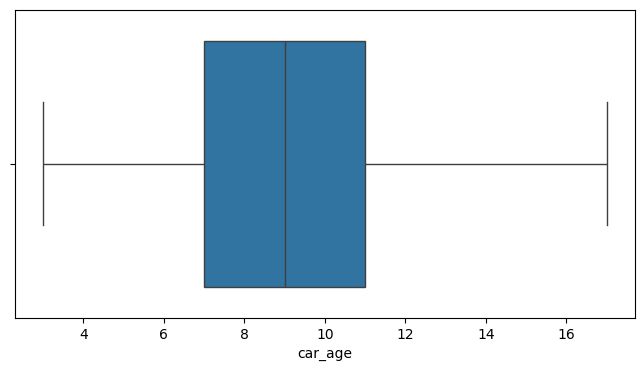

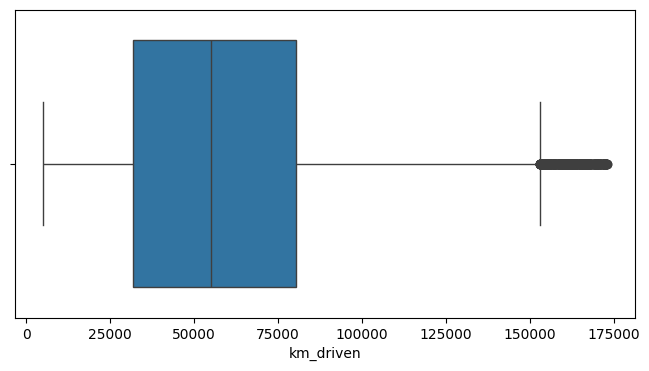

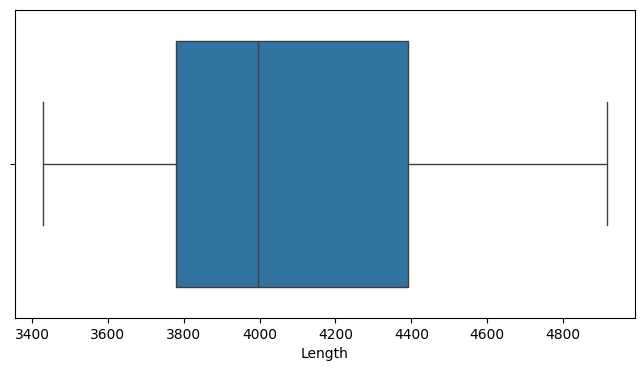

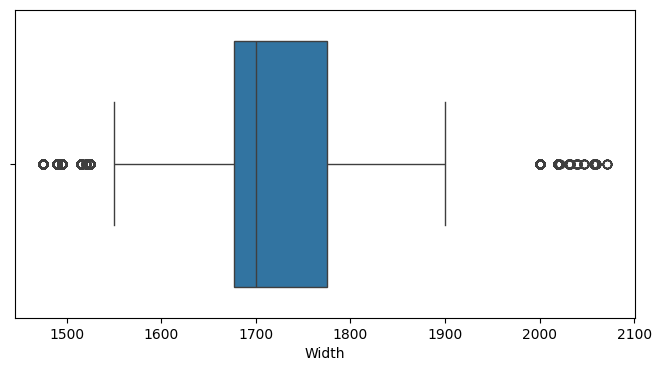

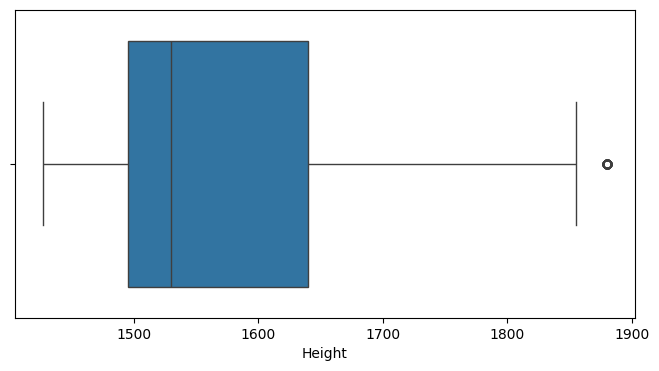

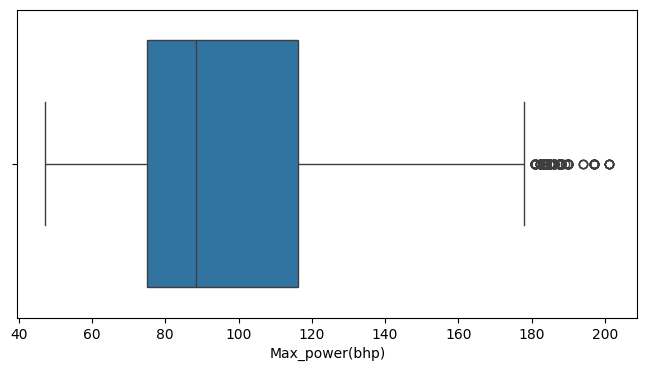

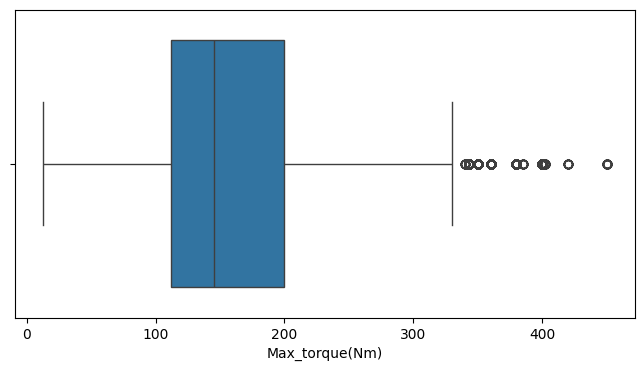

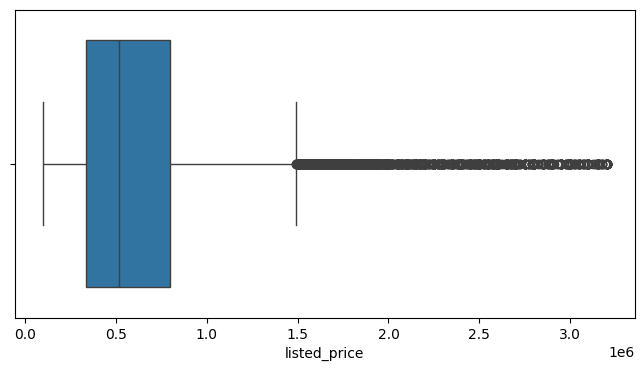

In [75]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=filtered_df[col])
    plt.show()

#### Insights from plot
1. No outleirs in car_age
2. km_driven has still some outliers
3. Length has no outliers
4. width has some outliers
5. Height with no outliers
6. Max power and Max torque have moderate no of outliers
7. High number of outliers caused by SUVs, luxury cars, and convertibles with significantly higher prices than typical listings.

#### Multivariate Analysis

In [76]:
# boxplot, violin plot, pairplot, heatmap
numeric_cols

['car_age',
 'km_driven',
 'Length',
 'Width',
 'Height',
 'Max_power(bhp)',
 'Max_torque(Nm)',
 'listed_price']

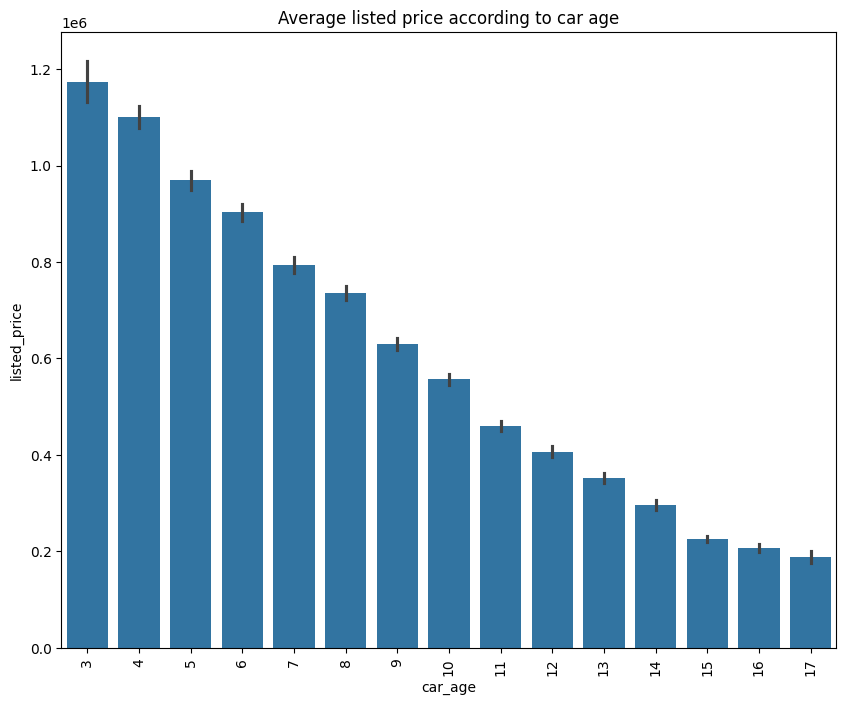

In [77]:
plt.figure(figsize=(10, 8))
sns.barplot(data=filtered_df, x="car_age", y="listed_price")
plt.xticks(rotation=90)
plt.title("Average listed price according to car age")
plt.show()

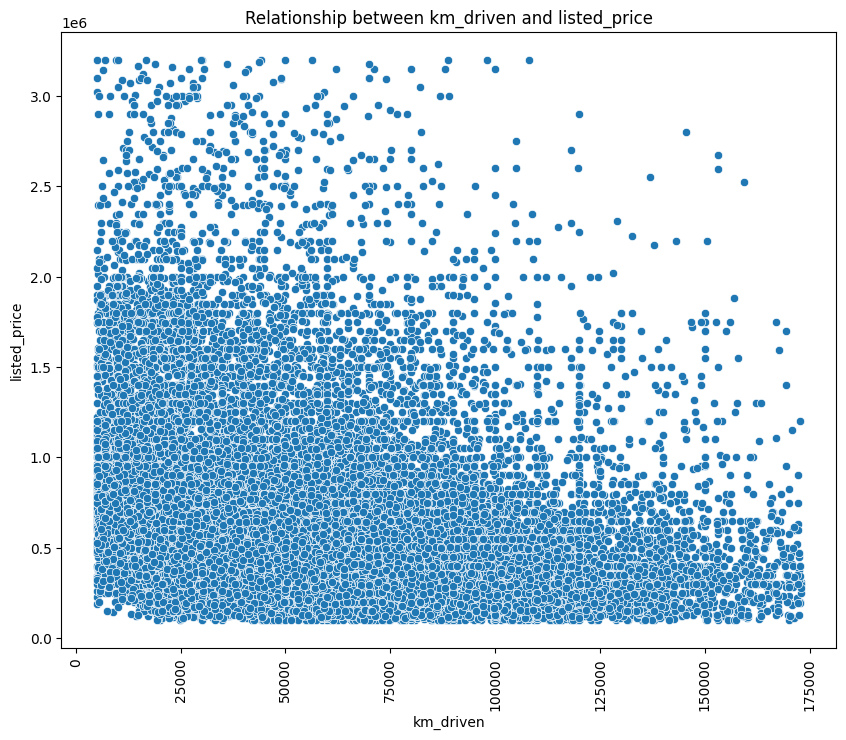

In [78]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=filtered_df, x="km_driven", y="listed_price")
plt.xticks(rotation=90)
plt.title("Relationship between km_driven and listed_price")
plt.show()

- **As the KM_driven is increasing the price is decreasing which is obvious**

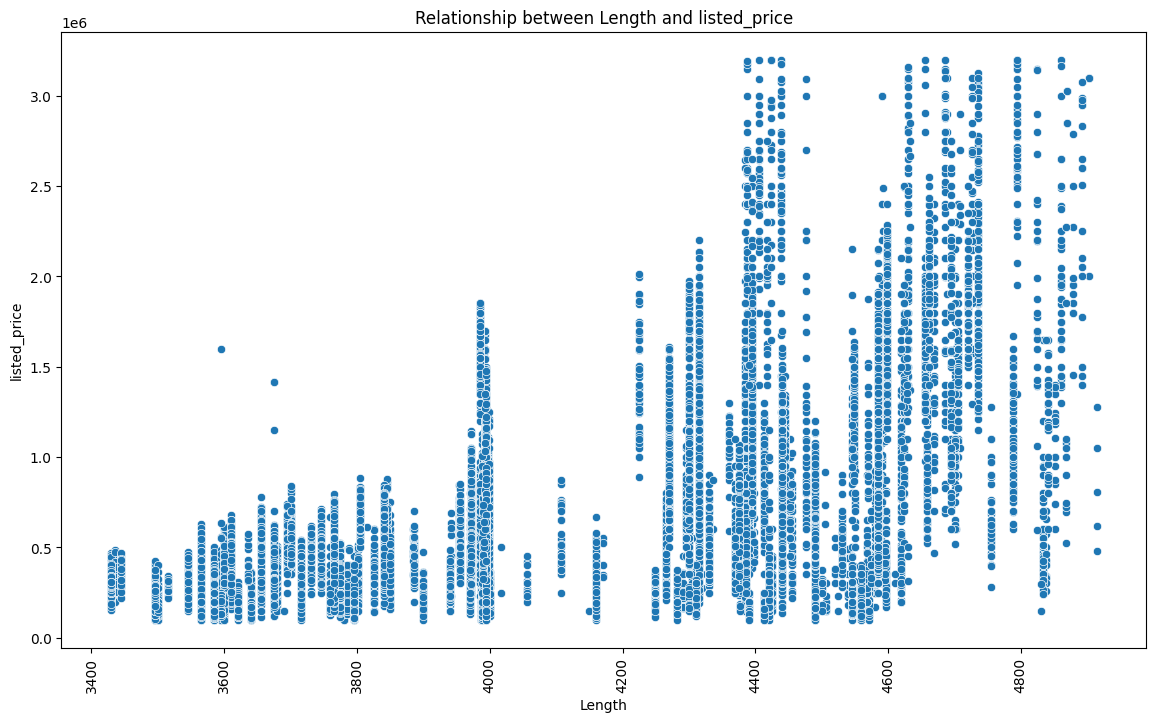

In [79]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=filtered_df, x="Length", y="listed_price")
plt.xticks(rotation=90)
plt.title("Relationship between Length and listed_price")
plt.show()

- **As length increase listing price of some cars also increases, still there are many cars with low prices with increasing length**

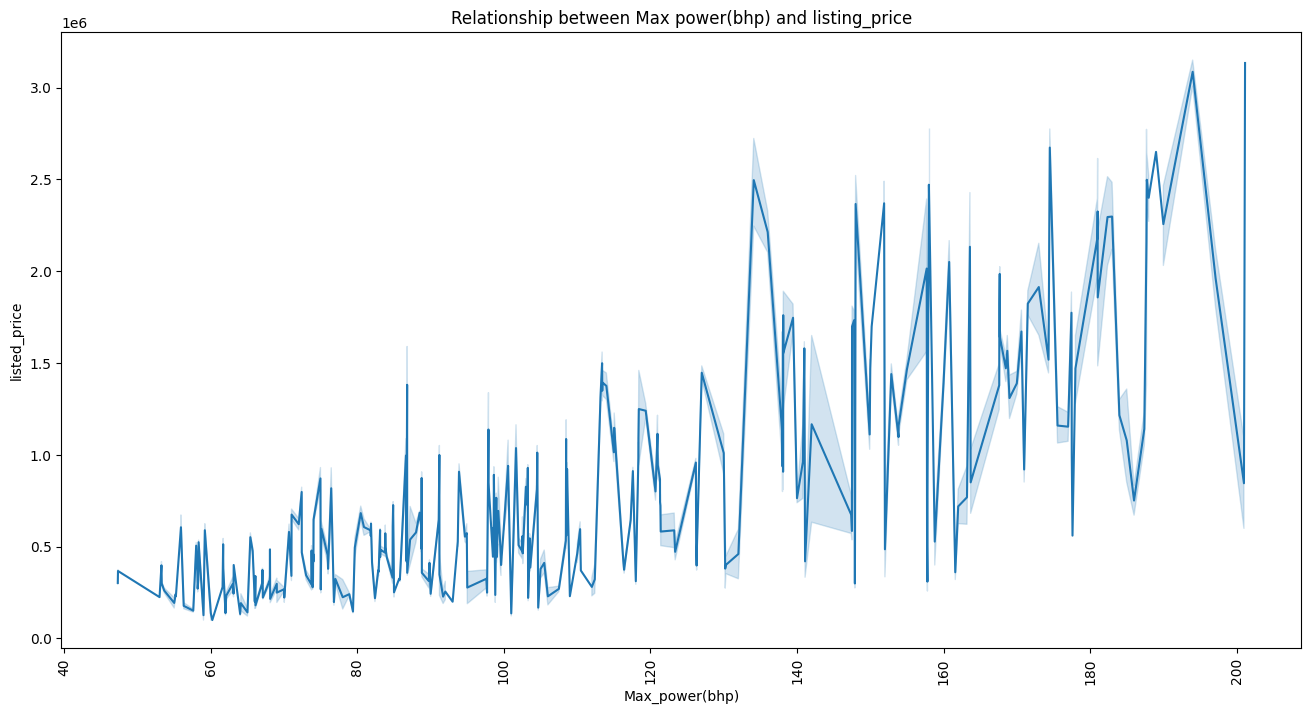

In [80]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=filtered_df, x="Max_power(bhp)", y="listed_price")
plt.xticks(rotation=90)
plt.title("Relationship between Max power(bhp) and listing_price")
plt.show()

- **List price goes on increasing when Max_power increases, there are many sudden falls may be due to car_age**

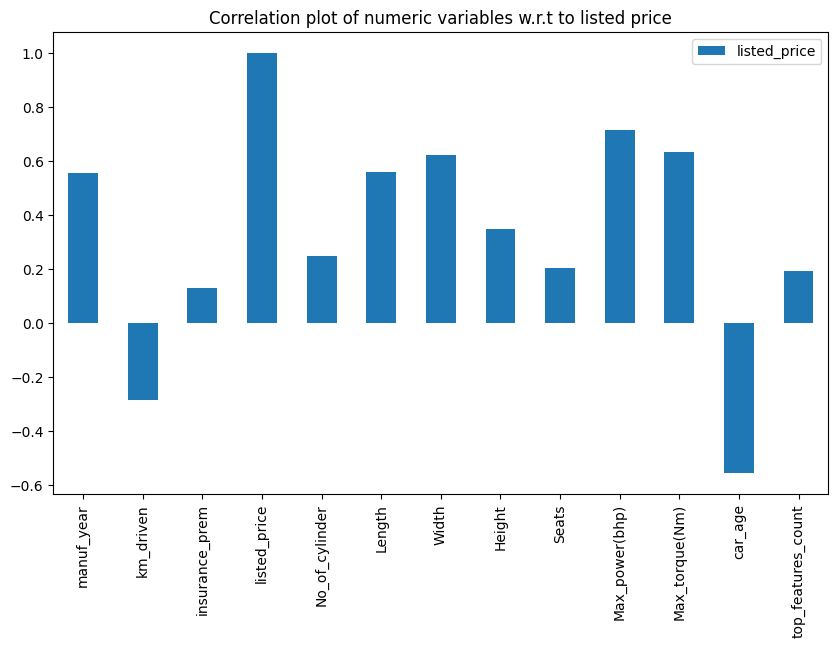

In [81]:
plt.figure(figsize=(10, 6))
filtered_df.corr(numeric_only=True)["listed_price"].plot(kind="bar")
plt.title("Correlation plot of numeric variables w.r.t to listed price")
plt.legend()
plt.show()

### Data preprocessing

In [82]:
# Remove the unnecessary variable that are not useful during model training and testing

filtered_df.columns

Index(['manuf_year', 'body', 'transmission', 'fuel', 'km_driven',
       'insurance_prem', 'manufacturer', 'model', 'listed_price', 'car_seller',
       'No_of_cylinder', 'Length', 'Width', 'Height', 'Seats', 'state',
       'owner_type', 'Max_power(bhp)', 'Max_torque(Nm)', 'car_age',
       'top_features_count'],
      dtype='object')

In [84]:
filtered_df.drop(columns=[ "body", "transmission", "fuel", "No_of_cylinder","Length", "Width", "Height",
                           "Seats", "Max_power(bhp)", "Max_torque(Nm)"]).to_csv("manuf_year_df.csv")

In [38]:
filtered_df = filtered_df.drop(columns=["manuf_year", "body", "transmission", "fuel", "No_of_cylinder",
                                     "Length", "Width", "Height", "Seats", "Max_power(bhp)", "Max_torque(Nm)"])

In [39]:
filtered_df.head()

,km_driven,insurance_prem,manufacturer,model,listed_price,car_seller,state,owner_type,car_age,top_features_count
0,69162.0,0,maruti,maruti wagon r,370000.0,dealer,uttar pradesh,first,9,9
1,45864.0,0,maruti,maruti celerio,365000.0,dealer,maharashtra,first,10,8
2,81506.0,0,honda,honda amaze,421000.0,dealer,delhi,second,10,9
3,115893.0,0,maruti,maruti wagon r,240000.0,dealer,delhi,second,12,8
4,18900.0,0,maruti,maruti ertiga,1175000.0,dealer,maharashtra,first,3,9


In [40]:
# Number of categories per column

print(f"manufacturer: {len(filtered_df["manufacturer"].unique())}")
print(f"model: {len(filtered_df["model"].unique())}")
print(f"car_seller: {len(filtered_df["car_seller"].unique())}")
print(f"state: {len(filtered_df["state"].unique())}")
print(f"owner_type: {len(filtered_df["owner_type"].unique())}")

manufacturer: 22
model: 128
car_seller: 2
state: 32
owner_type: 6


In [41]:
filtered_df["car_seller"].value_counts()

car_seller
dealer        26373
individual     4365
Name: count, dtype: int64

In [42]:
# mapping the values as it has only two categories

filtered_df["car_seller"] = filtered_df["car_seller"].map({'dealer':1, 'individual':0})
filtered_df.head()

,km_driven,insurance_prem,manufacturer,model,listed_price,car_seller,state,owner_type,car_age,top_features_count
0,69162.0,0,maruti,maruti wagon r,370000.0,1,uttar pradesh,first,9,9
1,45864.0,0,maruti,maruti celerio,365000.0,1,maharashtra,first,10,8
2,81506.0,0,honda,honda amaze,421000.0,1,delhi,second,10,9
3,115893.0,0,maruti,maruti wagon r,240000.0,1,delhi,second,12,8
4,18900.0,0,maruti,maruti ertiga,1175000.0,1,maharashtra,first,3,9


In [43]:
# Mapping the 1st owner with higher priority 1, and other values with their respective priority

filtered_df["owner_type"] = filtered_df["owner_type"].map({'unregistered car':0,'first':1,'second':2,'third':3,'fourth':4,'fifth':5})
filtered_df.head()

,km_driven,insurance_prem,manufacturer,model,listed_price,car_seller,state,owner_type,car_age,top_features_count
0,69162.0,0,maruti,maruti wagon r,370000.0,1,uttar pradesh,1,9,9
1,45864.0,0,maruti,maruti celerio,365000.0,1,maharashtra,1,10,8
2,81506.0,0,honda,honda amaze,421000.0,1,delhi,2,10,9
3,115893.0,0,maruti,maruti wagon r,240000.0,1,delhi,2,12,8
4,18900.0,0,maruti,maruti ertiga,1175000.0,1,maharashtra,1,3,9


In [45]:
# filtered_df.to_csv("cleaned_data.csv")

In [85]:
# Instead of using OneHotEncoding using pd.get_dummies, output is almost same with subtle differences

state_onehot = pd.get_dummies(filtered_df["state"], prefix='state', dtype=int)
filtered_df = pd.concat([filtered_df, state_onehot], axis=1).drop(columns=["state"])
filtered_df.head()

,km_driven,insurance_prem,manufacturer,model,listed_price,car_seller,owner_type,car_age,top_features_count,state_andhra pradesh,state_arunachal pradesh,state_assam,state_bihar,state_chandigarh,state_chhattisgarh,state_dadra and nagar haveli,state_delhi,state_goa,state_gujarat,state_haryana,state_himachal pradesh,state_jammu & kashmir,state_jharkhand,state_karnataka,state_kerala,state_madhya pradesh,state_maharashtra,state_manipur,state_meghalaya,state_nagaland,state_odisha,state_pondicherry,state_punjab,state_rajasthan,state_sikkim,state_tamil nadu,state_telangana,state_tripura,state_uttar pradesh,state_uttarakhand,state_west bengal
0,69162.0,0,maruti,maruti wagon r,370000.0,1,1,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,45864.0,0,maruti,maruti celerio,365000.0,1,1,10,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,81506.0,0,honda,honda amaze,421000.0,1,2,10,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,115893.0,0,maruti,maruti wagon r,240000.0,1,2,12,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18900.0,0,maruti,maruti ertiga,1175000.0,1,1,3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [86]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(filtered_df.drop(columns=["listed_price"]), filtered_df["listed_price"], test_size=0.2, random_state=2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24590, 40)
(6148, 40)
(24590,)
(6148,)


In [87]:
X_train

,km_driven,insurance_prem,manufacturer,model,car_seller,owner_type,car_age,top_features_count,state_andhra pradesh,state_arunachal pradesh,state_assam,state_bihar,state_chandigarh,state_chhattisgarh,state_dadra and nagar haveli,state_delhi,state_goa,state_gujarat,state_haryana,state_himachal pradesh,state_jammu & kashmir,state_jharkhand,state_karnataka,state_kerala,state_madhya pradesh,state_maharashtra,state_manipur,state_meghalaya,state_nagaland,state_odisha,state_pondicherry,state_punjab,state_rajasthan,state_sikkim,state_tamil nadu,state_telangana,state_tripura,state_uttar pradesh,state_uttarakhand,state_west bengal
747,53120.0,0,maruti,maruti celerio,1,1,6,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12324,8297.0,0,jeep,jeep compass,1,1,7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27131,22265.0,0,maruti,maruti ertiga,1,1,5,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21782,120000.0,0,maruti,maruti ciaz,0,1,7,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18545,35800.0,0,hyundai,hyundai i20,1,1,5,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15979,10000.0,0,hyundai,hyundai creta,0,1,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
37272,54531.0,0,hyundai,hyundai i20,1,2,15,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8833,80777.0,0,chevrolet,chevrolet enjoy,1,1,12,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3549,34026.0,0,renault,renault kwid,1,1,5,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [88]:
y_train

747       555000.0
12324    1600000.0
27131    1050000.0
21782     600000.0
18545     799000.0
           ...    
15979    1300000.0
37272     287228.0
8833      200000.0
3549      380000.0
29811     400000.0
Name: listed_price, Length: 24590, dtype: float64

In [89]:
from category_encoders import TargetEncoder
labelEnc = LabelEncoder()
targetEnc = TargetEncoder()
onehot = OneHotEncoder()

labelEnc = LabelEncoder()
X_train_manufacturer = pd.DataFrame(
    labelEnc.fit_transform(X_train["manufacturer"]),
    columns=["manufacturer_encoded"],
    index=X_train.index
)
X_test_manufacturer = pd.DataFrame(
    labelEnc.transform(X_test["manufacturer"]),
    columns=["manufacturer_encoded"],
    index=X_test.index
)

targetEnc = TargetEncoder()
X_train_model = targetEnc.fit_transform(X_train["model"], y_train)
X_train_model = X_train_model.rename(columns={"model": "model_encoded"})
X_test_model = targetEnc.transform(X_test["model"])
X_test_model = X_test_model.rename(columns={"model": "model_encoded"})

- **Label encoder for car manufacturers**
- **Target encoder select all specific car models and then calculates the mean of their target listed_price, that is why the values in model_encode is too much high**
- **For model column I used pd.get_dummies for one hot encoding which is a simple way**

In [90]:
X_train_final = pd.concat([X_train_manufacturer, X_train_model, X_train], axis=1).drop(columns=["manufacturer","model"])
X_test_final = pd.concat([X_test_manufacturer, X_test_model, X_test], axis=1).drop(columns=["manufacturer","model"])

In [91]:
X_train_final.head()

,manufacturer_encoded,model_encoded,km_driven,insurance_prem,car_seller,owner_type,car_age,top_features_count,state_andhra pradesh,state_arunachal pradesh,state_assam,state_bihar,state_chandigarh,state_chhattisgarh,state_dadra and nagar haveli,state_delhi,state_goa,state_gujarat,state_haryana,state_himachal pradesh,state_jammu & kashmir,state_jharkhand,state_karnataka,state_kerala,state_madhya pradesh,state_maharashtra,state_manipur,state_meghalaya,state_nagaland,state_odisha,state_pondicherry,state_punjab,state_rajasthan,state_sikkim,state_tamil nadu,state_telangana,state_tripura,state_uttar pradesh,state_uttarakhand,state_west bengal
747,12,4.404666e+05,53120.0,0,1,1,6,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
12324,8,1.588570e+06,8297.0,0,1,1,7,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
27131,12,7.211839e+05,22265.0,0,1,1,5,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21782,12,6.542124e+05,120000.0,0,0,1,7,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18545,7,5.444200e+05,35800.0,0,1,1,5,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [92]:
X_test_final.head()

,manufacturer_encoded,model_encoded,km_driven,insurance_prem,car_seller,owner_type,car_age,top_features_count,state_andhra pradesh,state_arunachal pradesh,state_assam,state_bihar,state_chandigarh,state_chhattisgarh,state_dadra and nagar haveli,state_delhi,state_goa,state_gujarat,state_haryana,state_himachal pradesh,state_jammu & kashmir,state_jharkhand,state_karnataka,state_kerala,state_madhya pradesh,state_maharashtra,state_manipur,state_meghalaya,state_nagaland,state_odisha,state_pondicherry,state_punjab,state_rajasthan,state_sikkim,state_tamil nadu,state_telangana,state_tripura,state_uttar pradesh,state_uttarakhand,state_west bengal
26360,10,8.966441e+05,24067.0,0,1,1,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30134,12,2.666370e+05,78237.0,0,1,1,14,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31087,7,4.380360e+05,45000.0,0,1,1,8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6988,18,2.116928e+05,95000.0,0,1,1,13,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8206,13,2.265996e+06,57000.0,0,1,1,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: >

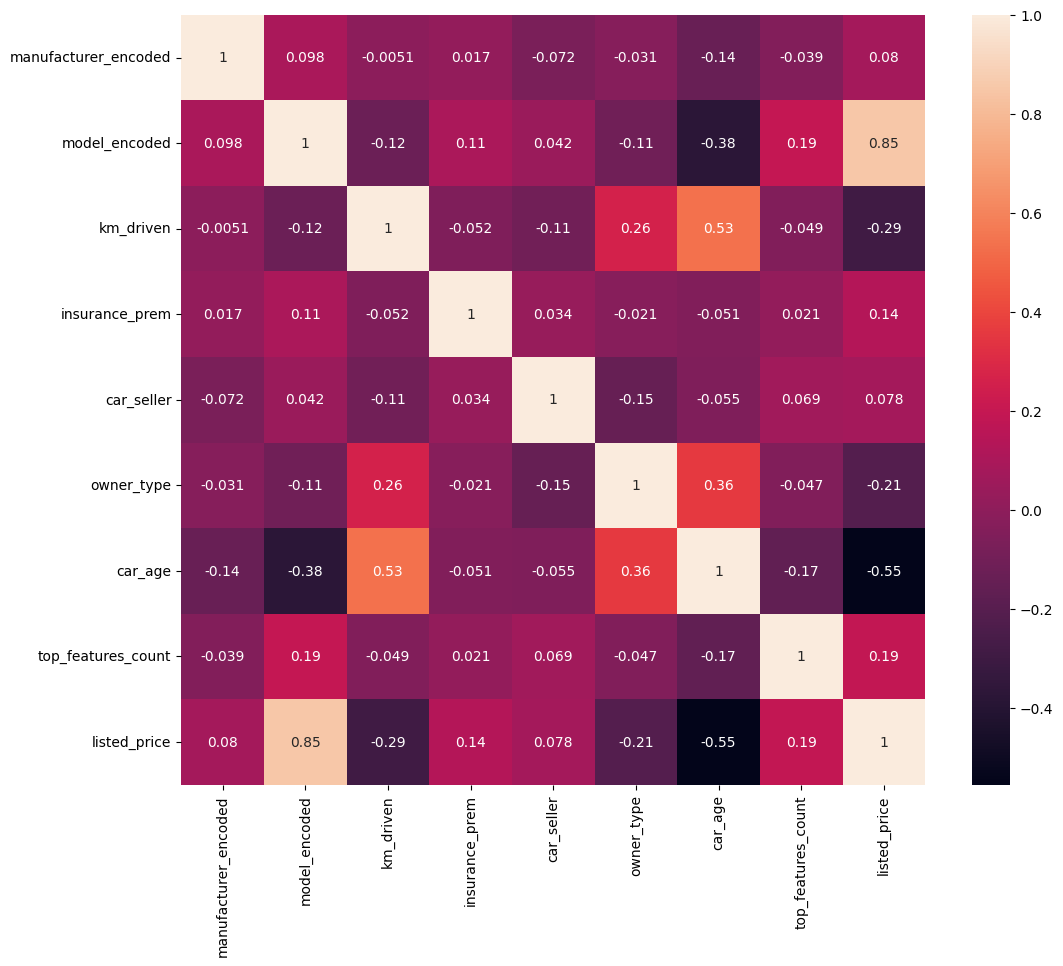

In [96]:
plt.figure(figsize=(12, 10))
sns.heatmap(pd.concat([X_train_final, y_train], axis=1).drop(columns=['state_andhra pradesh', 'state_arunachal pradesh', 'state_assam',
       'state_bihar', 'state_chandigarh', 'state_chhattisgarh',
       'state_dadra and nagar haveli', 'state_delhi', 'state_goa',
       'state_gujarat', 'state_haryana', 'state_himachal pradesh',
       'state_jammu & kashmir', 'state_jharkhand', 'state_karnataka',
       'state_kerala', 'state_madhya pradesh', 'state_maharashtra',
       'state_manipur', 'state_meghalaya', 'state_nagaland', 'state_odisha',
       'state_pondicherry', 'state_punjab', 'state_rajasthan', 'state_sikkim',
       'state_tamil nadu', 'state_telangana', 'state_tripura',
       'state_uttar pradesh', 'state_uttarakhand', 'state_west bengal']).corr(numeric_only=True), annot=True)

### Model building

In [100]:
import warnings

warnings.filterwarnings('ignore')

In [101]:
import time
models = {
    'Random_Forest': RandomForestRegressor(random_state=30),
    'XGBoost': XGBRegressor(random_state=30, device="cuda", predictor='gpu_predictor'),
    'Adaboost': AdaBoostRegressor(random_state=30),
    'Gradient_Boosting': GradientBoostingRegressor(random_state=30),
    'Bagging': BaggingRegressor(random_state=30)
}

results = []
start = time.time()
for name, model in models.items():
    print(f"training using {name}:")
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)

    # calc mse, r2score and storing it
    mse = mean_squared_error(y_test, y_pred)
    r2s = r2_score(y_test, y_pred)

    model_data = {
        'model': name,
        'MSE': mse,
        'r2_score': r2s
    }
    results.append(model_data)

print(time.time() - start)
results_df = pd.DataFrame(results)

training using Random_Forest:
training using XGBoost:
training using Adaboost:
training using Gradient_Boosting:
training using Bagging:
30.068061351776123


In [102]:
results_df

,model,MSE,r2_score
0,Random_Forest,1.227376e+10,0.943904
1,XGBoost,1.140846e+10,0.947859
2,Adaboost,8.291056e+10,0.621068
3,Gradient_Boosting,2.714079e+10,0.875956
4,Bagging,1.325996e+10,0.939397


In [103]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(models["XGBoost"], X_train_final, y_train, cv=5, scoring='r2')
print("XGBoost CV R² Scores:", scores)
print("Mean R²:", scores.mean())


XGBoost CV R² Scores: [0.93908419 0.94039045 0.93584557 0.94253704 0.93962396]
Mean R²: 0.9394962414631784


In [104]:
models["XGBoost"].get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': 'cuda',
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 30,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'predictor': 'gpu_predictor'}

#### Hyperparameter Tuning

In [106]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth':[3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}
xgb = XGBRegressor(random_state=30, device='cuda',predictor='gpu_predictor')
randomcv = RandomizedSearchCV(estimator=xgb,param_distributions=param_grid,
                              n_iter=50, cv=3,scoring='neg_mean_squared_error',
                              verbose=2, random_state=42, n_jobs=-1)

In [107]:
randomcv.fit(X_train_final, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.6, 0.8, ...], 'gamma': [0, 1, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [3, 5, ...], ...}"
,n_iter,50
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [109]:
best_model = randomcv.best_estimator_
best_params = randomcv.best_params_

y_pred = best_model.predict(X_test_final)

print(mean_squared_error(y_test, y_pred))

print(best_model)
print(best_params)

11145597304.33003
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)
{'subsample': 0.8, 'reg_lambda': 2, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 0.6}


In [118]:
print(f"MSE Difference in base model vs Tuned model: {1.140846e+10 - 11145597304.33003}")
print(f"Percentage difference: {262862695/1.140846e+10*100:.2f}%")
print("2.3% of error reduction")

MSE Difference in base model vs Tuned model: 262862695.66996956
Percentage difference: 2.30%
2.3% of error reduction


In [120]:
import joblib

# saving encoding models
joblib.dump(labelEnc, 'models/labelEnc.pkl') # for manufacturer
joblib.dump(targetEnc, 'models/TargetEnc.pkl') # for models

# saving XGBoost model
joblib.dump(randomcv.best_estimator_, 'models/car_price_pred_model.pkl')

['models/car_price_pred_model.pkl']

In [127]:
X_test_final

,manufacturer_encoded,model_encoded,km_driven,insurance_prem,car_seller,owner_type,car_age,top_features_count,state_andhra pradesh,state_arunachal pradesh,state_assam,state_bihar,state_chandigarh,state_chhattisgarh,state_dadra and nagar haveli,state_delhi,state_goa,state_gujarat,state_haryana,state_himachal pradesh,state_jammu & kashmir,state_jharkhand,state_karnataka,state_kerala,state_madhya pradesh,state_maharashtra,state_manipur,state_meghalaya,state_nagaland,state_odisha,state_pondicherry,state_punjab,state_rajasthan,state_sikkim,state_tamil nadu,state_telangana,state_tripura,state_uttar pradesh,state_uttarakhand,state_west bengal
26360,10,8.966441e+05,24067.0,0,1,1,4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30134,12,2.666370e+05,78237.0,0,1,1,14,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31087,7,4.380360e+05,45000.0,0,1,1,8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6988,18,2.116928e+05,95000.0,0,1,1,13,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8206,13,2.265996e+06,57000.0,0,1,1,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8443,2,1.602201e+05,5000.0,0,0,3,12,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15240,12,7.517827e+05,74979.0,0,1,2,9,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25039,7,4.380360e+05,51675.0,0,1,2,8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17100,12,6.264235e+05,23535.0,0,1,1,3,8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [124]:
y_test

26360    2145000.0
30134     150000.0
31087     465000.0
6988      365000.0
8206     1998500.0
           ...    
8443      190000.0
15240     600000.0
25039     551000.0
17100     625000.0
32824     904000.0
Name: listed_price, Length: 6148, dtype: float64

In [130]:
data = np.array([10, 8.966441e+05, 24000, 0, 1, 1, 4, 9, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
print(data.shape)
print(type(data))

(40,)
<class 'numpy.ndarray'>


In [133]:
int(best_model.predict([data])[0])

1790112